# Astroplan Plotting Examples - Sky Plot

To generate sky plots with `Astroplan`, use the `plot_sky` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_sky` will return an `Axes` object with target positions plotted at the time(s) specified.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## General guidelines.

Most users will want to see the positions of several `Target`s with respect to an `Observer`'s zenith, as well as the positions of familiar stars or other objects to act as guides.  Since `plot_sky` allows you to pass in only one `Target` at a time (like `plot_airmass` and `plot_parallactic`), you have to reuse the returned `Axes` object to map multiple objects on the same figure. 

However, you have the option of using either a scalar (length=1) `Time` object, or one with populated with multiple times.  This means that you can see the position of celestial bodies at a single instance in time or map them over the course of a night.

Note that whichever option you take, you must use the same `Observer` when reusing an `Axes` object.  

`plot_sky` currently produces plots in altitude/azimuth coordinates only. 

## Making a sky plot for one instance in time.

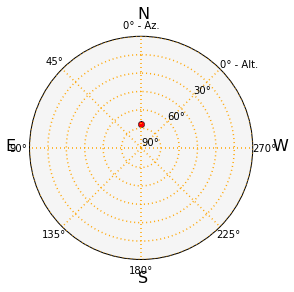

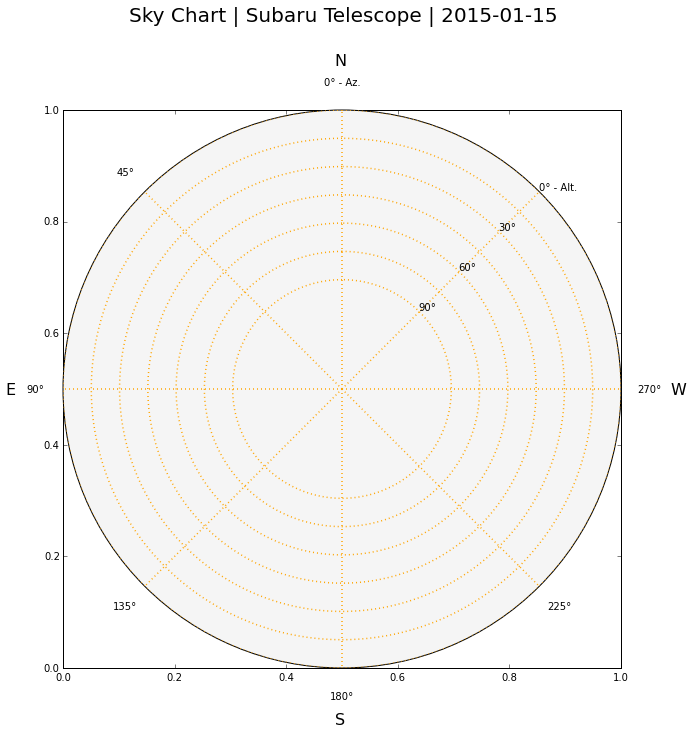

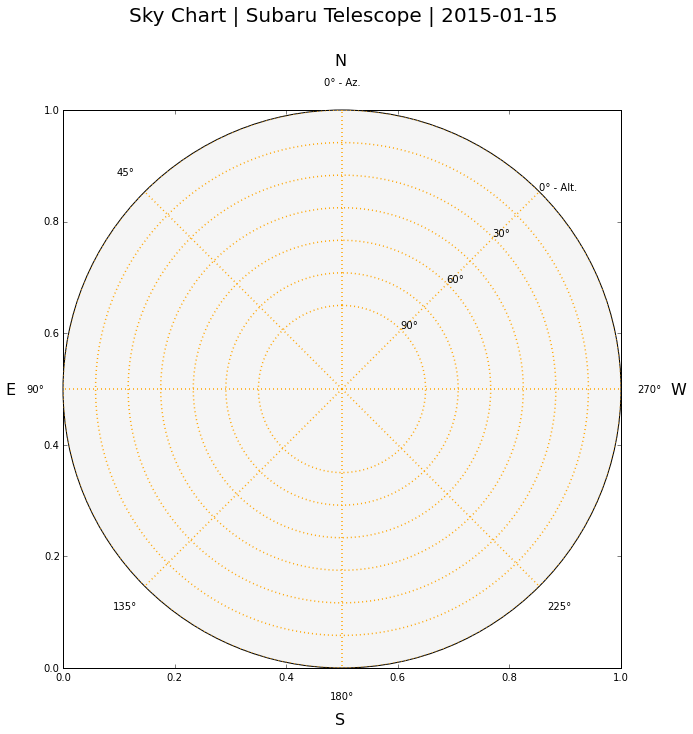

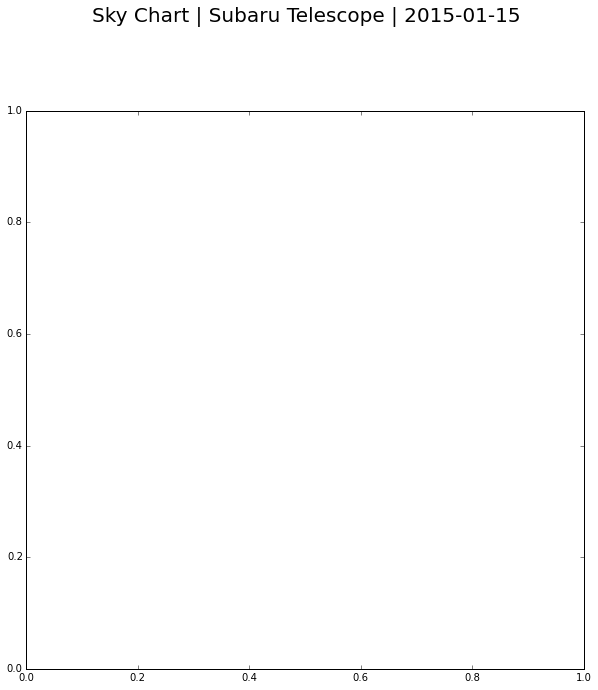

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_sky

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
polaris = FixedTarget(name='Polaris', coord=coordinates)

coordinates = SkyCoord('06h45m08.9173s', '-16d42m58.017s', frame='icrs')
sirius = FixedTarget(name='Sirius', coord=coordinates)
sirius_style = {'marker': 'o', 'color': 'b'}

coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
pollux = FixedTarget(name='Pollux', coord=coordinates)
pollux_style = {'marker': 'o', 'color': 'g'}

observe_time = Time('2015-01-15 23:30:00')

plot_sky(polaris, observer, observe_time)
plot_sky(sirius, observer, observe_time, style_kwargs=sirius_style)
plot_sky(pollux, observer, observe_time, style_kwargs=pollux_style)

plt.show()

## Showing the movement of celestial bodies over time.

You make a plot that shows how your targets move over some period in much the same way you make a plot for one instance of time.  You simply input a vector instead of a scalar `Time` object--that is, just populate your `Time` object with multiple times.

You can center the window of time covered by your `Time` object at one particular instance...

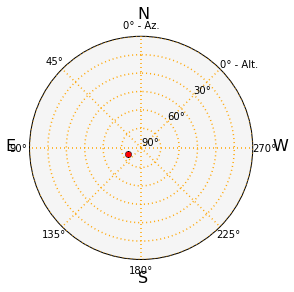

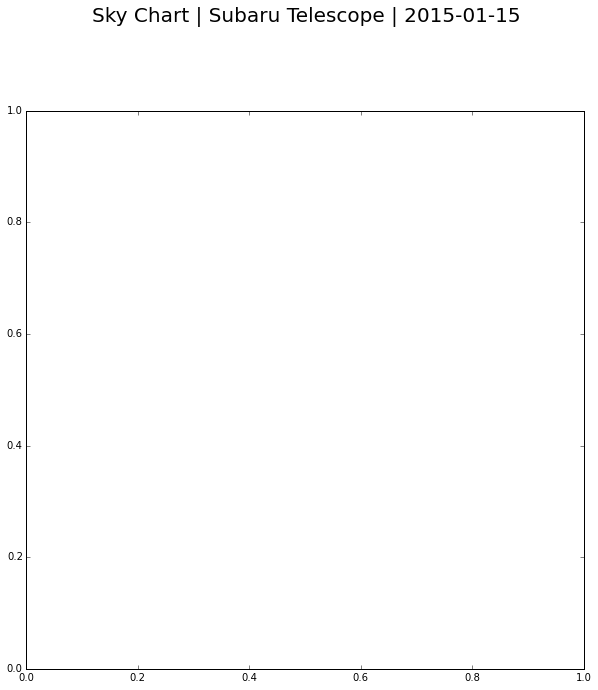

In [10]:
import numpy as np

observe_time = Time('2015-01-16 00:45:00')
observe_time = observe_time + np.linspace(-4, 4, 9)*u.hour

plot_sky(sirius, observer, observe_time)
#plt.show()

...or, if you know the start and end times of your observation run, you can use a `DeltaTime` object.

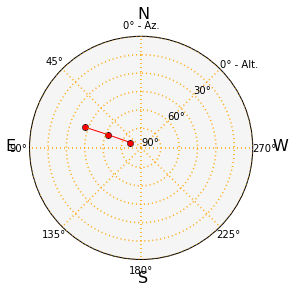

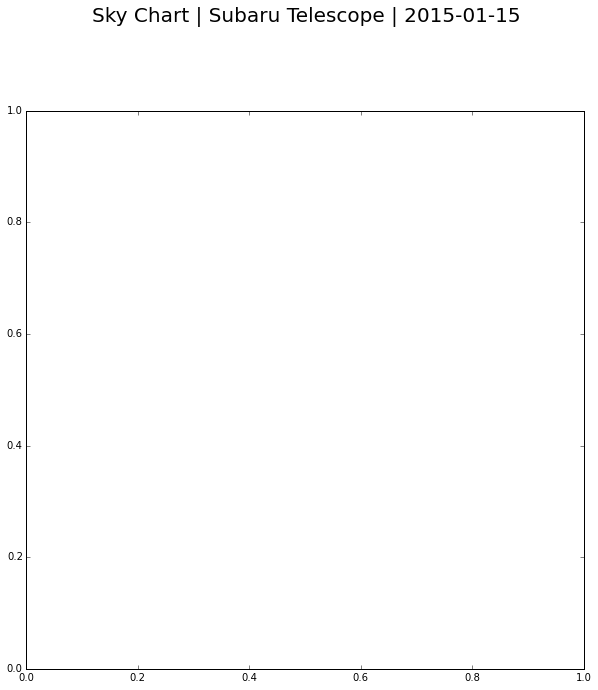

In [11]:
start_time = Time('2015-01-15 18:00:00')
end_time = Time('2015-01-16 07:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 10)

plot_sky(pollux, observer, observe_time)
plt.show()

## Changing style options.

You can change the `linestyle` and `color` properties of any data set by setting the `style_kwargs` option, as seen above in the various examples.  

One situation in which this is particularly useful is the plotting of guide positions, such as a few familiar stars or any body used in calibrating your telescope.  You can also use this feature to set apart different types of targets, etc.

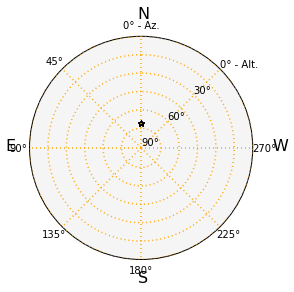

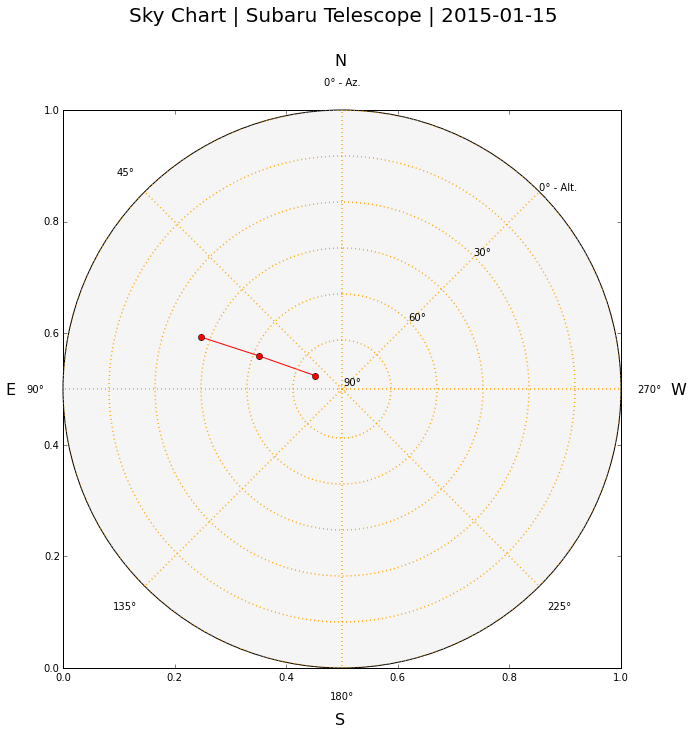

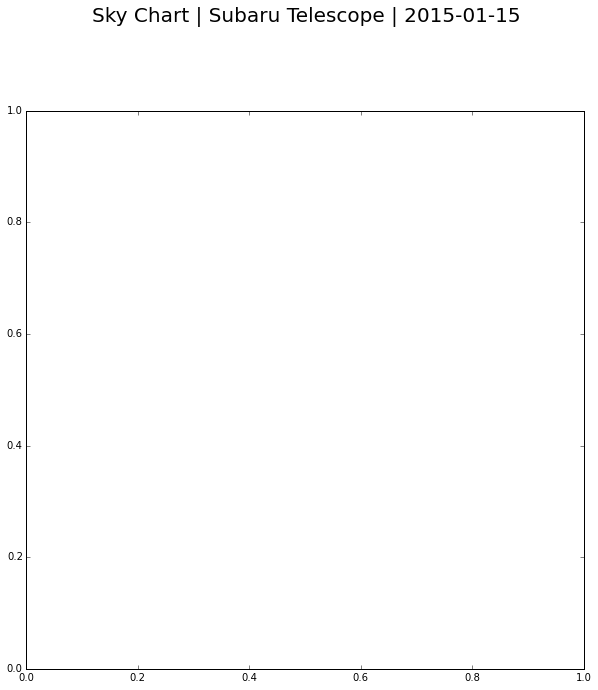

In [12]:
guides_style = {'marker': '*', 'color': 'k'}

plot_sky(polaris, observer, observe_time, style_kwargs=guides_style)
plot_sky(pollux, observer, observe_time)

plt.show()

You can also set a dark background and light axes, ticks, labels, etc.

In [13]:
#plot_sky(target, observer, observe_time, dark_plot=True)

#plt.show()